# Using One-vs-Rest Logistic Rgression (Classification model) 

To classify different flowers in Iris Dataset

In [7]:
import pandas as pd

Reading Iris Dataset that consists of several features like: 

sepal_length, sepal_width, petal_length, petal_width  and a labelled column i.e. species.

There are three different flower species: setosa, versicolor and virginica. So, here we have more than two classes and therefore we are using the multi-class classification model.

The model is first trained with training data and then tested on the test data.

In [2]:
iris = pd.read_csv('iris_dataset.csv')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Visualizing the relationship between different features

In [14]:
import seaborn as sns

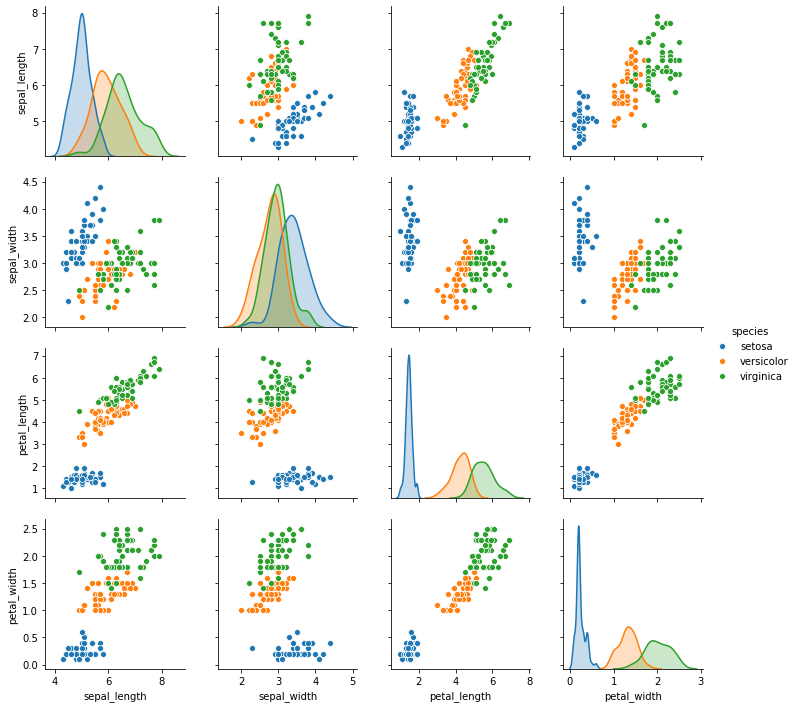

In [15]:
sns.pairplot(iris, hue='species', diag_kind='kde')

Splitting the dataset into training and test datasets. Considering 20% of dataset as test data.

X = input features

y = target / label

In [16]:
X = iris.loc[:,'sepal_length':'petal_width']
y = iris['species']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [19]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [20]:
y_train.head()

137     virginica
84     versicolor
27         setosa
127     virginica
132     virginica
Name: species, dtype: object

Fitting Multi_class Logistic Regression model to the training dataset.

Using test dataset for prediction of different types of flowers.

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression(multi_class = 'ovr', random_state = 0)

To avoid any future warnings, ignore the warnings using the code as follows:

In [24]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [25]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

Using test dataset for prediction f the target label

In [26]:
y_predicted = clf.predict(X_test)

To see the probablity values of the predictions for the three classes(setosa, versicolor and virginica).

In [28]:
clf.predict_proba(X_test)

array([[8.48551777e-04, 1.75187088e-01, 8.23964360e-01],
       [2.55349832e-02, 8.28280027e-01, 1.46184990e-01],
       [9.38770402e-01, 6.12219632e-02, 7.63524745e-06],
       [1.95595855e-04, 3.92858391e-01, 6.06946013e-01],
       [8.59320284e-01, 1.40622105e-01, 5.76113536e-05],
       [2.66875251e-04, 1.55252833e-01, 8.44480292e-01],
       [8.95117125e-01, 1.04841756e-01, 4.11191018e-05],
       [2.35243207e-02, 6.58831216e-01, 3.17644464e-01],
       [1.08833116e-02, 6.98823212e-01, 2.90293477e-01],
       [7.00413669e-02, 7.49572383e-01, 1.80386250e-01],
       [5.20656908e-04, 4.20959554e-01, 5.78519789e-01],
       [4.26710447e-02, 6.21482821e-01, 3.35846134e-01],
       [1.09432076e-02, 6.34645730e-01, 3.54411062e-01],
       [1.40712441e-02, 6.19260220e-01, 3.66668536e-01],
       [1.06714217e-02, 5.32156800e-01, 4.57171779e-01],
       [8.01498547e-01, 1.98425468e-01, 7.59849427e-05],
       [1.58451196e-02, 5.00866210e-01, 4.83288670e-01],
       [1.09602570e-02, 5.46972

Cross-validation on a unknown sample data

In [29]:
import numpy as np
a = pd.DataFrame(np.array([5,3,1,.5]).reshape(1,4))
clf.predict_proba(a)

array([[8.73651989e-01, 1.26285533e-01, 6.24787693e-05]])

In [30]:
dict = {'Y_test':y_test, 'Y_predicted':y_predicted}
df = pd.DataFrame(dict)
df

,Y_test,Y_predicted
114,virginica,virginica
62,versicolor,versicolor
33,setosa,setosa
107,virginica,virginica
7,setosa,setosa
100,virginica,virginica
40,setosa,setosa
86,versicolor,versicolor
76,versicolor,versicolor
71,versicolor,versicolor


In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cnf = confusion_matrix(y_test, y_predicted, labels = ['setosa','versicolor','virginica'])
cnf

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(69.0, 0.5, 'Actual')

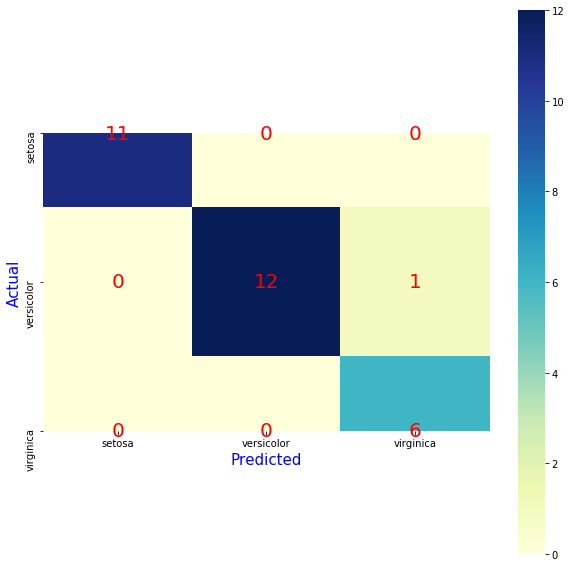

In [34]:
plt.figure(figsize=(10,10))
label = ['setosa','versicolor','virginica']
sns.heatmap(cnf, annot = True, fmt = 'g', cmap="YlGnBu", annot_kws={'size':20,'color':'red'}, xticklabels = label,
           yticklabels = label, square = True)
plt.xlabel('Predicted', size = 15, color = 'blue')
plt.ylabel('Actual', size = 15, color = 'blue')

Interpreting the Classification Report to see accuracy score, precision, recall, etc.

In [35]:
from sklearn.metrics import classification_report

In [36]:
print("Report")
print(classification_report(y_test, y_predicted))

Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

